### Importamos librería pandas

In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns

### El Dataset contiene diversas secuencias, no solo peptidos, por lo que, filtraremos Title por solo peptidos, conservaremos solo la secuencias predichas y filtraremos por actividad antifungal

### Archivo TSV

### Importamos Dataset, convertimos en DataFrame y contamos filas y columnas

In [ ]:
url_CAMPR4 = "https://raw.githubusercontent.com/AnaLuisaIA/antifungal-peptides/011419fe410243c5bcb20c94c53883737c25a130/Base%20de%20datos/CAMPR4/campr4.txt"

df_CAMPR4 = pd.read_csv(url_CAMPR4, sep="\t", encoding="latin-1", on_bad_lines='skip')
df_CAMPR4.to_csv("campr4.csv", index=False)
df_CAMPR4.head()

,Camp_ID,Title,Source_Organism,Taxonomy,Seqence,Length,Pubmed_id,Activity,Validation,Modifications,Target
0,CAMPSQ16448,Os,Ornithodoros savignyi,NaN,KGIRGYKGGYCKGAFKQTCKCY,NaN,31713951,"Antibacterial, Antifungal",Experimentally validated,NaN,"E.coli, P.aeruginosa, S.aureus, B. subtilis"
1,CAMPSQ16690,Col1,Harmonia axyridis,Animalia,LQPGAPNFPIPGQEKQEGWKFDPSLTRGEDGNTLGSINIHHTGPNH...,NaN,30269257,"Antibacterial, Antifungal",Experimentally validated,NaN,"Escherichia coli ATCC 25922, S. aureus ATCC 25..."
2,CAMPSQ16691,Col6,Harmonia axyridis,Animalia,LQPGAPKLPYAWSRKQEGWKFDPSLTRGEDGNTLGSINIHHTGRNH...,NaN,30269257,"Antibacterial, Antifungal",Experimentally validated,NaN,"Escherichia coli ATCC 25922, S. aureus ATCC 25..."
3,CAMPSQ17336,HV-BBI [IX],Huia versabilis,NaN,SVIGCWTKSIPPRPCFVK,NaN,22516177,Antibacterial,Experimentally validated,C terminal -NH2,S. aureus (MIC = 60microg/ml)
4,CAMPSQ17337,HV-BBI(318) [X],Huia versabilis,NaN,IGCWTKSIPPRPCFVK,NaN,22516177,Antibacterial,Experimentally validated,C terminal -NH2,"E.coli (MIC = 160microg/ml), S. aureus (MIC = ..."


In [ ]:
dataframe_tsv = df_CAMPR4
dataframe_tsv.to_csv(
    'CAMPR4_tsv_original.csv',  # Nombre que tendrá el archivo
    index=False                        # Importante: No incluir el índice de filas de Pandas
)
files.download('CAMPR4_tsv_original.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_CAMPR4.shape

(11854, 11)

### Filtramos las columnas title por solo peptidos, la columna Activity aquellas que contengan antifungal y la columna Validation para obtener solo las secuencias predichas

In [ ]:
df_CAMPR4_activity_antifungal = df_CAMPR4[(df_CAMPR4['Activity'].str.contains("Antifungal|antifungal", case=False, na=False))&(df_CAMPR4['Title'].str.contains("peptide|Peptide", case=False, na=False))&(df_CAMPR4['Validation'].str.contains("Predicted", case=False, na=False))].copy()
df_CAMPR4_activity_antifungal.head()

,Camp_ID,Title,Source_Organism,Taxonomy,Seqence,Length,Pubmed_id,Activity,Validation,Modifications,Target
2184,CAMPSQ11801,Peptide P1,Myrmecia pilosula,Animalia (Insects),GLGSVFGRLARILGRVIPKV,20.0,28470277,"Antibacterial, Antifungal",Predicted,NaN,NaN
2642,CAMPSQ2339,Brevinin-1CG5 antimicrobial peptide precursor,Amolops chunganensis,Animalia (Amphibia),LPMLAGLAANFLPKIVCKITKKC,23.0,22951323,"Antibacterial, Antifungal",Predicted,NaN,NaN
2705,CAMPSQ4383,Dermaseptin III-like peptide,Phyllomedusa burmeisteri,Animalia (Amphibia),ALWKNMLKGIGKLAGKAALGAVK,23.0,NaN,"Antibacterial, Antifungal, Antiprotozoal",Predicted,NaN,NaN
4622,CAMPSQ4390,Dermaseptin DS VIII-like peptide,Phyllomedusa burmeisteri,Animalia (Amphibia),ALWKTMLKKLGTVALHAGKAALGAAADTISQGA,33.0,NaN,"Antibacterial, Antifungal, Antiprotozoal",Predicted,NaN,NaN
4766,CAMPSQ6929,Cathelicidin-related antimicrobial peptide,Pseudonaja textilis,Animalia (Reptiles),KRFKKFFRKLKKSVKKRVKKFFKKPRVIGVTIPF,34.0,25100358,"Antibacterial, Antifungal",Predicted (Based on signature),NaN,NaN


In [ ]:
df_CAMPR4_activity_antifungal.shape

(24, 11)

###Guardamos el DataFrame de las secuencias que no presentan la actividad

In [ ]:
df_CAMPR4_activity_notantifungal = df_CAMPR4[~df_CAMPR4.index.isin(df_CAMPR4_activity_antifungal.index)].copy()
df_CAMPR4_activity_notantifungal.head(3)

,Camp_ID,Title,Source_Organism,Taxonomy,Seqence,Length,Pubmed_id,Activity,Validation,Modifications,Target
0,CAMPSQ16448,Os,Ornithodoros savignyi,NaN,KGIRGYKGGYCKGAFKQTCKCY,NaN,31713951,"Antibacterial, Antifungal",Experimentally validated,NaN,"E.coli, P.aeruginosa, S.aureus, B. subtilis"
1,CAMPSQ16690,Col1,Harmonia axyridis,Animalia,LQPGAPNFPIPGQEKQEGWKFDPSLTRGEDGNTLGSINIHHTGPNH...,NaN,30269257,"Antibacterial, Antifungal",Experimentally validated,NaN,"Escherichia coli ATCC 25922, S. aureus ATCC 25..."
2,CAMPSQ16691,Col6,Harmonia axyridis,Animalia,LQPGAPKLPYAWSRKQEGWKFDPSLTRGEDGNTLGSINIHHTGRNH...,NaN,30269257,"Antibacterial, Antifungal",Experimentally validated,NaN,"Escherichia coli ATCC 25922, S. aureus ATCC 25..."


In [ ]:
df_CAMPR4_activity_notantifungal.shape

(11830, 11)

###Seleccionamos solo las columnas de interés: secuncias y label

In [ ]:
df_CAMPR4_activity_antifungal = df_CAMPR4_activity_antifungal[["Seqence", "Activity"]]
df_CAMPR4_activity_antifungal.head()

,Seqence,Activity
2184,GLGSVFGRLARILGRVIPKV,"Antibacterial, Antifungal"
2642,LPMLAGLAANFLPKIVCKITKKC,"Antibacterial, Antifungal"
2705,ALWKNMLKGIGKLAGKAALGAVK,"Antibacterial, Antifungal, Antiprotozoal"
4622,ALWKTMLKKLGTVALHAGKAALGAAADTISQGA,"Antibacterial, Antifungal, Antiprotozoal"
4766,KRFKKFFRKLKKSVKKRVKKFFKKPRVIGVTIPF,"Antibacterial, Antifungal"


### Agregamos una columna nueva llamada label, donde solo asignaremos 1, considerando que solo tenemos secuencias que poseen la actividad.

In [ ]:
df_CAMPR4_activity_antifungal['label'] = 1
df_CAMPR4_activity_antifungal.head()

,Seqence,Activity,label
2184,GLGSVFGRLARILGRVIPKV,"Antibacterial, Antifungal",1
2642,LPMLAGLAANFLPKIVCKITKKC,"Antibacterial, Antifungal",1
2705,ALWKNMLKGIGKLAGKAALGAVK,"Antibacterial, Antifungal, Antiprotozoal",1
4622,ALWKTMLKKLGTVALHAGKAALGAAADTISQGA,"Antibacterial, Antifungal, Antiprotozoal",1
4766,KRFKKFFRKLKKSVKKRVKKFFKKPRVIGVTIPF,"Antibacterial, Antifungal",1


### Conservamos solo las columnas Sequence y label

In [ ]:
df_CAMPR4_antifungal = df_CAMPR4_activity_antifungal[["Seqence", "label"]]
df_CAMPR4_antifungal.head()

,Seqence,label
2184,GLGSVFGRLARILGRVIPKV,1
2642,LPMLAGLAANFLPKIVCKITKKC,1
2705,ALWKNMLKGIGKLAGKAALGAVK,1
4622,ALWKTMLKKLGTVALHAGKAALGAAADTISQGA,1
4766,KRFKKFFRKLKKSVKKRVKKFFKKPRVIGVTIPF,1


In [ ]:
df_CAMPR4_antifungal = df_CAMPR4_antifungal.rename(columns={"Seqence": "Sequence"})
df_CAMPR4_antifungal

,Sequence,label
2184,GLGSVFGRLARILGRVIPKV,1
2642,LPMLAGLAANFLPKIVCKITKKC,1
2705,ALWKNMLKGIGKLAGKAALGAVK,1
4622,ALWKTMLKKLGTVALHAGKAALGAAADTISQGA,1
4766,KRFKKFFRKLKKSVKKRVKKFFKKPRVIGVTIPF,1
4855,KRDPQQREYEDCRRRCEQQEPRQQYQCQRRCREQQ,1
5051,YPPKPESPGEDASPEEMNKYLTALRHYINLVTRQRY,1
5257,EEERDADEEENEVSGYAANVNVKRCGYKHGRANCGRG,1
5345,AKCIKNGKGCREDQGPPFCCSGFCYRQVGWARGYCKNR,1
5461,SKIKDFAKKAWNSPLANELKSKALNAAKNFVSEKIGATP,1


# Limpieza del DataFrame

###Verificación de duplicados

In [ ]:
df = df_CAMPR4_antifungal

# 1. Crear el DataFrame que solo contiene las filas con secuencias duplicadas
filas_con_secuencias_duplicadas = df[
    df.duplicated(subset=['Sequence'], keep=False)
].sort_values(by='Sequence') # Ordenamos para que las secuencias repetidas aparezcan juntas

# 2. Imprimir los resultados
if len(filas_con_secuencias_duplicadas) > 0:
    print(f"✅ Se encontraron {len(filas_con_secuencias_duplicadas)} filas con secuencias duplicadas (incluyendo la primera aparición).")
    print("A continuación se muestran las filas duplicadas:")

    # Mostramos las columnas relevantes para la secuencia y actividad
    print(filas_con_secuencias_duplicadas[['Sequence', 'label']].head(20))
else:
    print("🎉 ¡No se encontraron secuencias duplicadas en tu DataFrame!")

🎉 ¡No se encontraron secuencias duplicadas en tu DataFrame!


In [ ]:
df_sin_duplicados = df_CAMPR4_antifungal.drop_duplicates(subset=['Sequence'], keep='first')
df_sin_duplicados.shape

(24, 2)

###Verificación de secuencias no canónicas

In [ ]:
df_sin_duplicados = df_sin_duplicados.copy()
df_sin_duplicados["Sequence"] = df_sin_duplicados["Sequence"].str.strip() #eliminamos los posibles espacios en la secuencia

In [ ]:
valid_mask = df_sin_duplicados["Sequence"].str.fullmatch(r"[ACDEFGHIKLMNPQRSTVWY]+", na=False)
invalid_df = df_sin_duplicados[~valid_mask].copy()
invalid_df

,Sequence,label


In [ ]:
# Mantener solo secuencias canónicas
filtered = df_sin_duplicados[valid_mask].copy()
filtered.shape

(24, 2)

In [ ]:
filtered.head()

,Sequence,label
2184,GLGSVFGRLARILGRVIPKV,1
2642,LPMLAGLAANFLPKIVCKITKKC,1
2705,ALWKNMLKGIGKLAGKAALGAVK,1
4622,ALWKTMLKKLGTVALHAGKAALGAAADTISQGA,1
4766,KRFKKFFRKLKKSVKKRVKKFFKKPRVIGVTIPF,1


In [ ]:
df_CAMPR4_antifungal_pos = filtered

### Longitud de la secuencia

In [ ]:
df_CAMPR4_antifungal_pos = df_CAMPR4_antifungal_pos.copy()  # opcional pero limpio
df_CAMPR4_antifungal_pos["Largo"] = df_CAMPR4_antifungal_pos["Sequence"].str.len()
df_CAMPR4_antifungal_pos["Largo"].describe()

,Largo
count,24.000000
mean,53.041667
std,53.928680
min,20.000000
25%,35.750000
50%,40.000000
75%,49.000000
max,299.000000


<Axes: xlabel='Largo', ylabel='Count'>

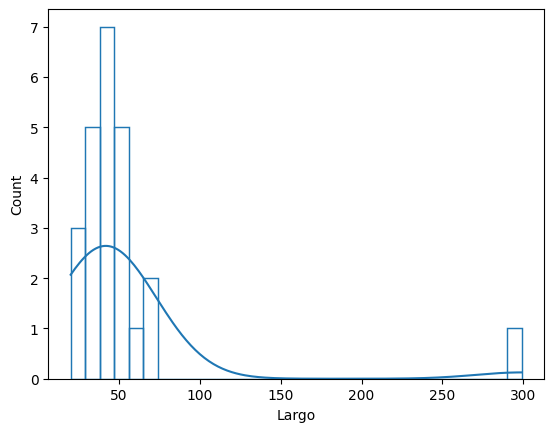

In [ ]:
sns.histplot(data=df_CAMPR4_antifungal_pos, x="Largo", fill=False, kde=True)

In [ ]:
df_CAMPR4_antifungal_pos[df_CAMPR4_antifungal_pos["Largo"] == 299]

,Sequence,label,Largo
11496,QQCGRQAGNRRCANNLCCSQYGYCGRTNEYCCTSQGCQSQCRRCGV...,1,299


In [ ]:
df_CAMPR4_antifungal_pos = filtered.copy() # Re-initialize to ensure it's a DataFrame
df_CAMPR4_antifungal_pos["Largo"] = df_CAMPR4_antifungal_pos["Sequence"].str.len() # Re-add Largo column
df_CAMPR4_antifungal_pos = df_CAMPR4_antifungal_pos[df_CAMPR4_antifungal_pos["Largo"] != 299]
df_CAMPR4_antifungal_pos.shape

(23, 3)

### Exportar CSV final

In [ ]:
dataframe_a_descargar = df_CAMPR4_antifungal_pos
dataframe_a_descargar.to_csv(
    'CAMPR4_antifungal.csv',  # Nombre que tendrá el archivo
    index=False                        # Importante: No incluir el índice de filas de Pandas
)
files.download('CAMPR4_antifungal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>